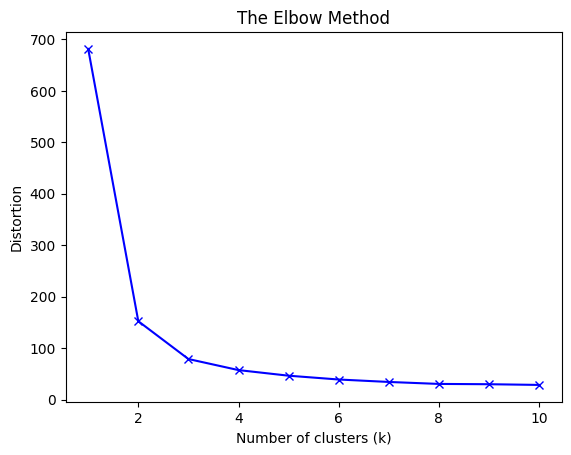

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
K = range(1, 11)  # Наприклад, від 1 до 10 кластерів
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()
#Завдання 1: Метод ліктя та силуетів для кластеризації на датасеті Ірис
#Завантаження та виведення перших рядків

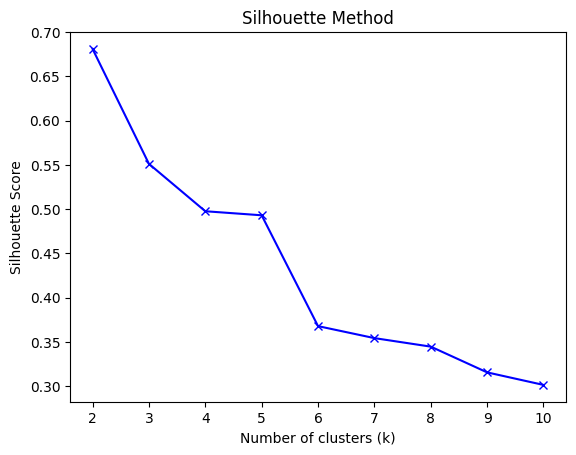

In [8]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):  # починаючи з 2 кластерів
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()
#Визначення оптимальної кількості кластерів методом ліктя

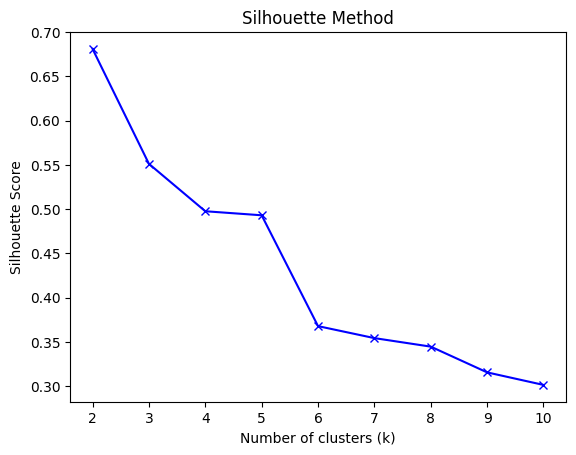

In [10]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):  # починаючи з 2 кластерів
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()
#Визначення оптимальної кількості кластерів методом силуетів

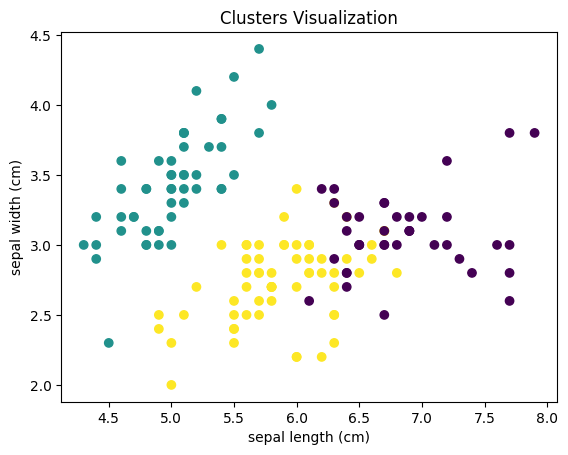

In [11]:
optimal_k = 3  # наприклад, якщо ліктьовий метод та силуети показали 3 кластери
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df)

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, cmap='viridis')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Clusters Visualization')
plt.show()
#Візуалізація кластерів

In [21]:
#Для Завдання 2 скористаємося датасетом titanic, щоб провести попередній аналіз, класифікацію і кластеризацію.
#Виведемо перші 5 рядків і розмір датасета
print(df.head())
print(df.shape)


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
(891, 15)


In [22]:
print(df.dtypes)


survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [24]:
df.fillna(df.select_dtypes(include=['float64', 'int64']).mean(), inplace=True)



In [25]:
print(df.isnull().sum())  # Подивимося, скільки пропущених значень

# Заповнення пропущених значень (лише для числових колонок)
df.fillna(df.mean(), inplace=True)


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


TypeError: can only concatenate str (not "int") to str

In [26]:
print(df.duplicated().sum())  # Перевірка кількості дублікатів
df.drop_duplicates(inplace=True)  # Видалення дублікатів


107


In [27]:
print(df.describe())


         survived      pclass         age       sibsp       parch        fare
count  784.000000  784.000000  784.000000  784.000000  784.000000  784.000000
mean     0.411990    2.243622   29.846335    0.522959    0.415816   34.711740
std      0.492507    0.855056   13.723868    0.986231    0.836922   52.160151
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   22.000000    0.000000    0.000000    8.050000
50%      0.000000    3.000000   29.699118    0.000000    0.000000   15.900000
75%      1.000000    3.000000   36.000000    1.000000    1.000000   34.109350
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [28]:
target_column = 'survived'  # Цільова змінна для класифікації


In [29]:
#Побудова трьох моделей та оптимізація
X = df.drop('survived', axis=1)
y = df['survived']


In [30]:
X = pd.get_dummies(X, drop_first=True)


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for model_name, model in models.items():
    param_grid = {}  # Додайте параметри для кожної моделі, якщо бажаєте
    grid = GridSearchCV(model, param_grid, cv=5)
    grid.fit(X_train, y_train)
    print(f"{model_name}: Best Parameters - {grid.best_params_}")


C:\Users\fallj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\fallj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Logistic Regression: Best Parameters - {}
Decision Tree: Best Parameters - {}
Random Forest: Best Parameters - {}


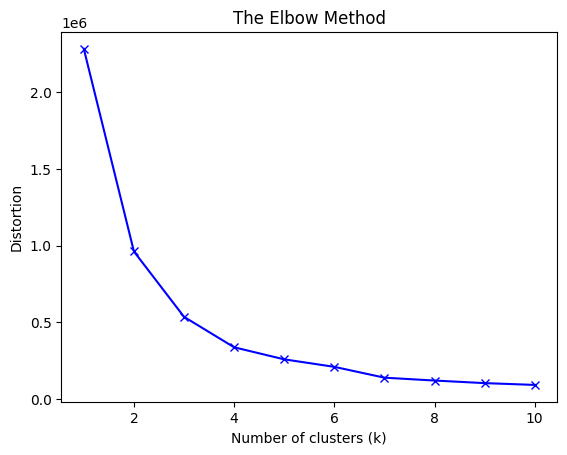

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()


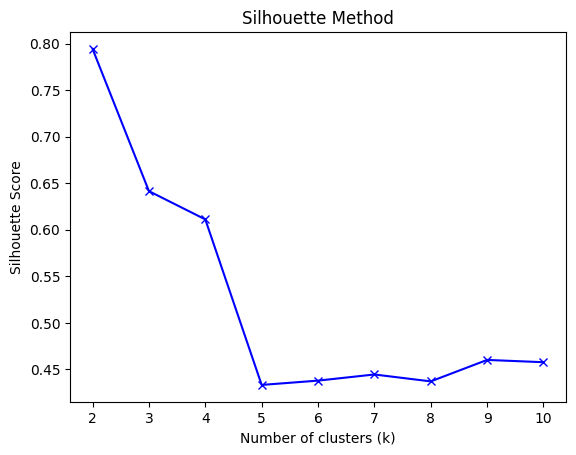

In [34]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()


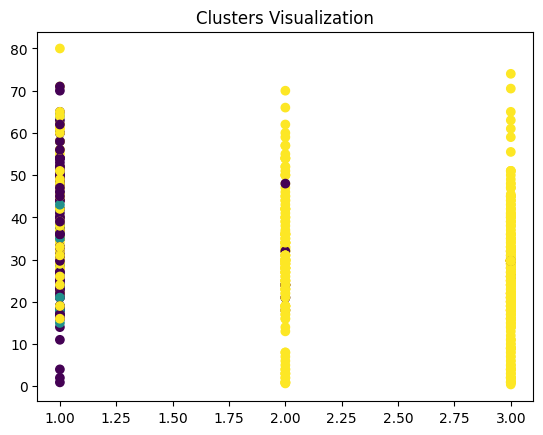

In [35]:
optimal_k = 3  # Замініть на оптимальне значення
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters Visualization')
plt.show()


In [ ]:
#Висновки
Після виконання всіх кроків можна зробити висновки про:

Найкращу кількість кластерів для даних.
Найбільш ефективну модель для класифікації (на основі метрик точності).
Можливості кластеризації для сегментації даних.